# **Assignment_4: Swimming Scholarship Enrollment Clustering**

# Data Dictionary:

The dataset for this assignment contains 500 observations, each representing a student applying
for a swimming scholarship. Below is the data dictionary:

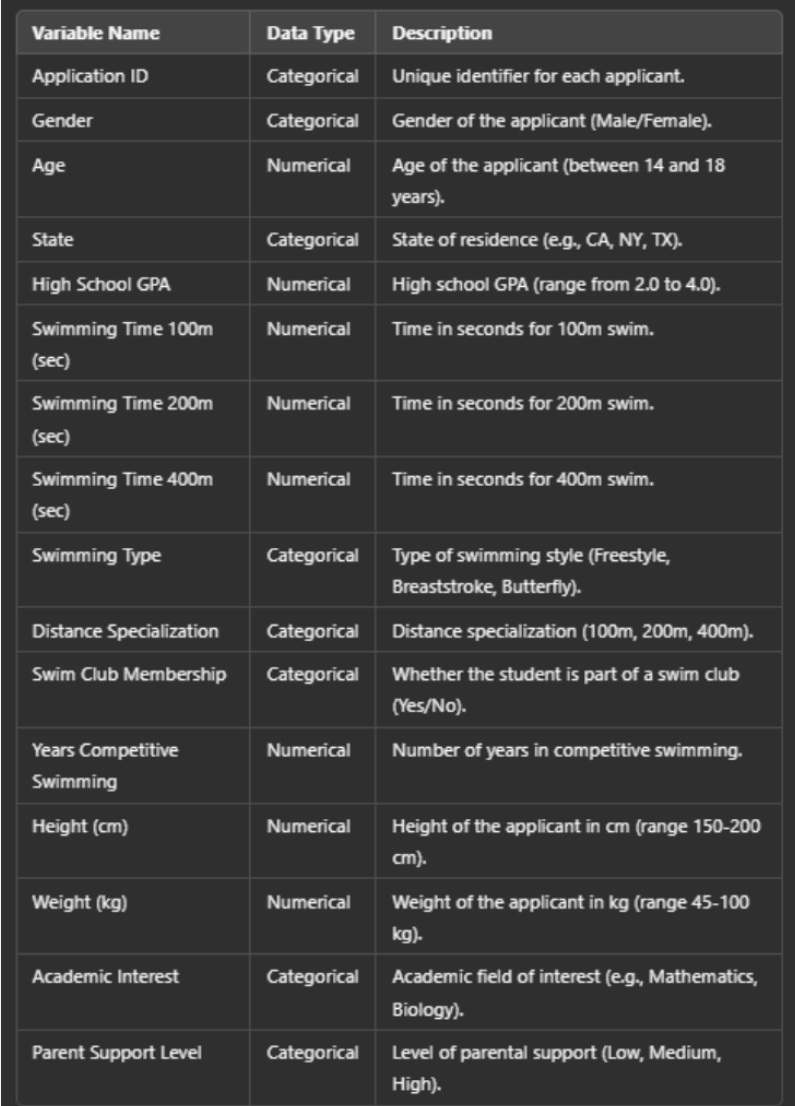

#Load and inspect the dataset

In [116]:
import pandas as pd
import seaborn as sns
import warnings
# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")
# Step 1: Import Required Libraries
# Importing the necessary Python libraries for data manipulation, visualization, and clustering
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For statistical data visualization
from sklearn.cluster import KMeans  # For K-Means clustering
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.metrics import silhouette_score, silhouette_samples  # For evaluating clustering performance
# Mount Google Drive (specific to Google Colab) to access data files stored on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
import os

# Define the file path
file_path = '/content/drive/My Drive/Machine_Learning/Assignment_4/swimming_scholarship_dataset_expanded.csv'

# Check if the file exists
if os.path.exists(file_path):
    print("File exists!")
else:
    print("File does not exist.")

File exists!


In [118]:
df = pd.read_csv(file_path)

In [119]:
df.sample(5)

Application ID  Gender  Age State  High School GPA  \
376        APP0377  Female   17    TX             3.44   
222        APP0223  Female   16    NC             3.24   
170        APP0171  Female   14    IL             2.79   
61         APP0062  Female   17    FL             3.17   
38         APP0039  Female   14    GA             2.17   

     Swimming Time 100m (sec)  Swimming Time 200m (sec)  \
376                     52.85                    112.73   
222                     63.10                    108.77   
170                     50.84                    136.84   
61                      57.79                    132.89   
38                      55.48                    148.50   

     Swimming Time 400m (sec) Swimming Type Distance Specialization  \
376                    326.82     Freestyle                    400m   
222                    396.82  Breaststroke                    200m   
170                    240.98     Freestyle                    200m   
61                     276.77     Freestyle                    200m   
38                     211.71     Freestyle                    100m   

    Swim Club Membership  Years Competitive Swimming  Height (cm)  \
376                   No                           7          190   
222                  Yes                           7          187   
170                   No                           5          152   
61                    No                           3          169   
38                   Yes                           4          197   

     Weight (kg) Academic Interest Parent Support Level  
376           86           Physics               Medium  
222           73           Physics                 High  
170           62           Biology                  Low  
61            78         Chemistry                  Low  
38            87         Economics               Medium

In [120]:
# Display the first few rows of the dataframe to understand the structure of the data
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display the general information about the dataset (e.g., column names, data types, non-null values)
print("\nDataset Information:")
df.info()

# Statistical summary of numerical columns in the dataset
print("\nStatistical Summary:")
print(df.describe())


First 5 rows of the dataset:
  Application ID  Gender  Age State  High School GPA  \
0        APP0001  Female   17    OH             3.01   
1        APP0002    Male   18    CA             3.65   
2        APP0003    Male   16    FL             2.64   
3        APP0004    Male   18    PA             3.79   
4        APP0005  Female   18    CA             2.78   

   Swimming Time 100m (sec)  Swimming Time 200m (sec)  \
0                     53.63                    101.83   
1                     61.66                    136.82   
2                     58.43                    133.19   
3                     67.85                    123.73   
4                     66.35                    142.21   

   Swimming Time 400m (sec) Swimming Type Distance Specialization  \
0                    352.20     Freestyle                    400m   
1                    207.06     Butterfly                    400m   
2                    349.15  Breaststroke                    100m   
3             

In [121]:
# Check for missing values in the dataset and handle them (e.g., impute or drop missing values)
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Drop rows with missing values for simplicity (you can use other imputation techniques as needed)
df.dropna(inplace=True)


Missing Values in Each Column:
Application ID                0
Gender                        0
Age                           0
State                         0
High School GPA               0
Swimming Time 100m (sec)      0
Swimming Time 200m (sec)      0
Swimming Time 400m (sec)      0
Swimming Type                 0
Distance Specialization       0
Swim Club Membership          0
Years Competitive Swimming    0
Height (cm)                   0
Weight (kg)                   0
Academic Interest             0
Parent Support Level          0
dtype: int64


# Part 1: K-Means Clustering

1. Data Exploration and Preprocessing

    o Separate categorical and numerical features.

    o Apply One-Hot Encoding to categorical variables.

    o Standardize/Normalize numerical features for clustering.

#3. Separate categorical and numerical features.

In [122]:
numerical_columns = df.select_dtypes(include=['number'])

In [123]:
categorical_columns = df.select_dtypes(include=['object', 'category'])

In [124]:
print("Numerical columns:", numerical_columns.columns)
print("Categorical columns:", categorical_columns.columns)

Numerical columns: Index(['Age', 'High School GPA', 'Swimming Time 100m (sec)',
       'Swimming Time 200m (sec)', 'Swimming Time 400m (sec)',
       'Years Competitive Swimming', 'Height (cm)', 'Weight (kg)'],
      dtype='object')
Categorical columns: Index(['Application ID', 'Gender', 'State', 'Swimming Type',
       'Distance Specialization', 'Swim Club Membership', 'Academic Interest',
       'Parent Support Level'],
      dtype='object')


 # 4. Perform Exploratory Data Analysis (EDA) to understand the distribution and patterns.

**Histogram plots for numerical columns**

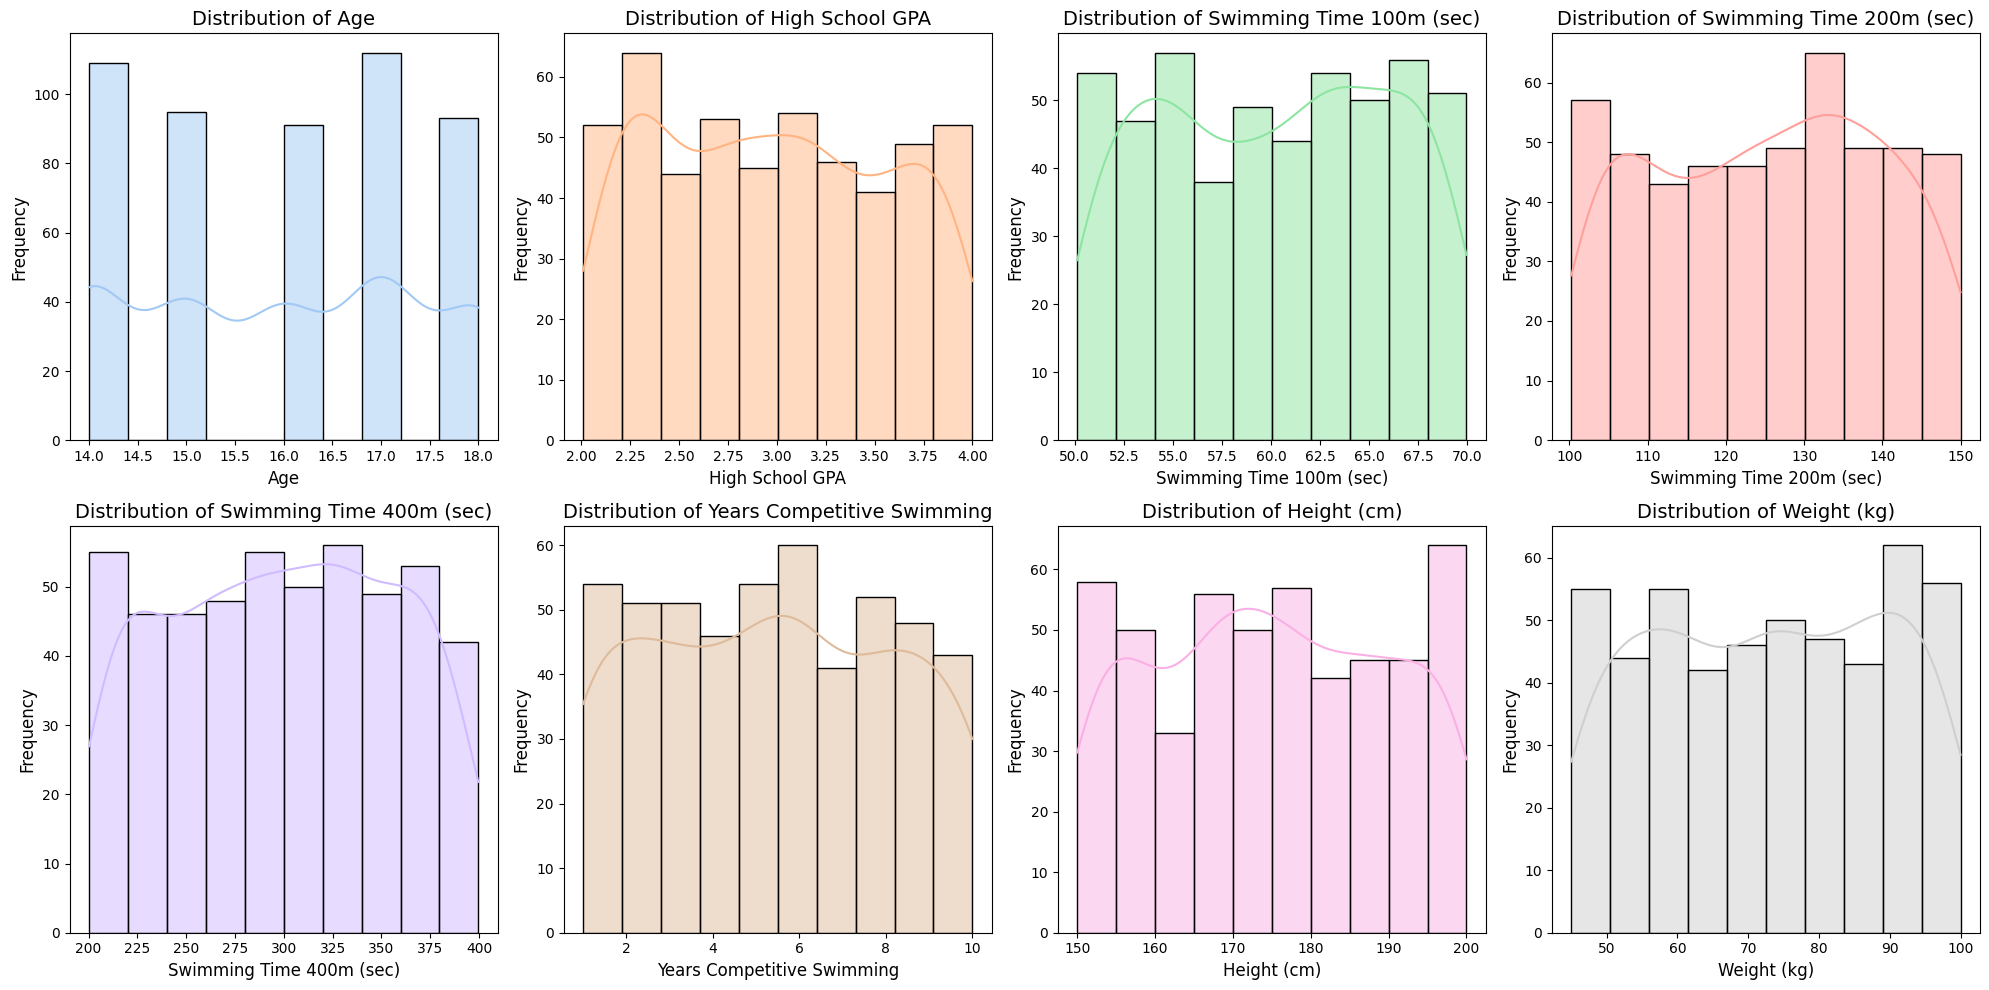

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for each numerical column
numerical_columns = ['Age', 'High School GPA', 'Swimming Time 100m (sec)',
       'Swimming Time 200m (sec)', 'Swimming Time 400m (sec)',
       'Years Competitive Swimming', 'Height (cm)', 'Weight (kg)']

# Calculate the number of rows and columns for subplots based on the number of columns
rows = 2
cols = len(numerical_columns) // rows if len(numerical_columns) % rows == 0 else (len(numerical_columns) // rows) + 1

# Create a multi-panel plot with specified rows and columns
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()

# Define the theme of colors using sns color palette
palette = sns.color_palette("pastel")  # Using pastel theme
colors = palette.as_hex() * 3

# Plot histograms for each numerical column with a specific color
for ax, column, color in zip(axes, numerical_columns, colors):
    sns.histplot(df[column], kde=True, color=color, ax=ax)
    ax.set_title(f"Distribution of {column}", fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

# Hide any unused axes
for ax in axes[len(numerical_columns):]:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


**Correlation heatmap for numerical columns**

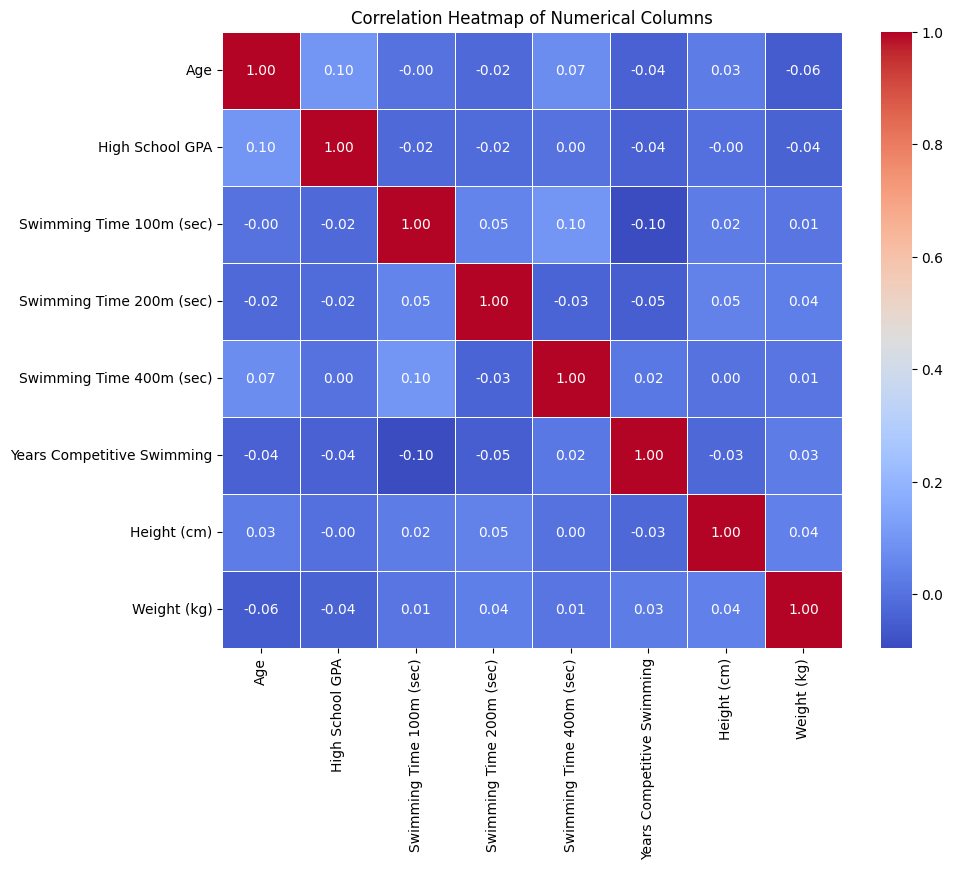

In [126]:
# Auto-select numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Generate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

**Count plots fro categorical columns**

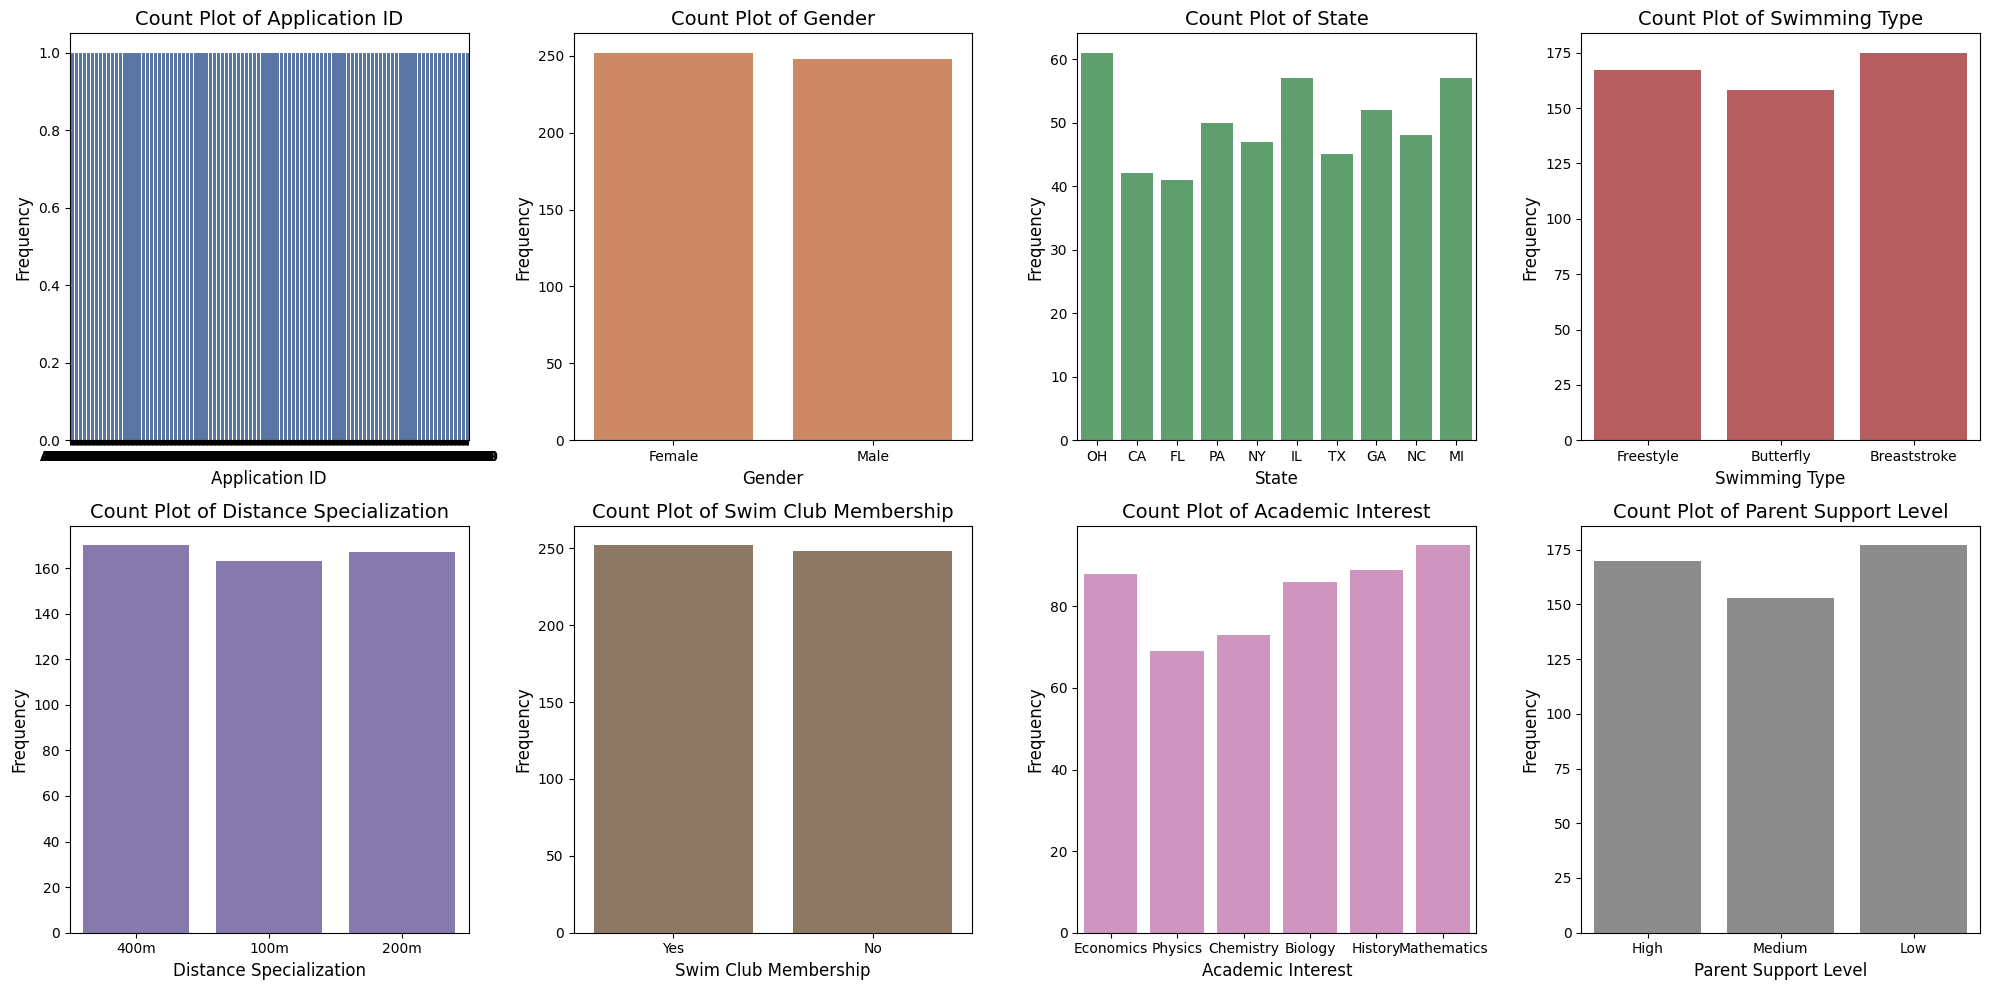

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for each numerical column
categorical_columns = ['Application ID', 'Gender', 'State', 'Swimming Type',
       'Distance Specialization', 'Swim Club Membership', 'Academic Interest',
       'Parent Support Level']

# Calculate the number of rows and columns for subplots based on the number of columns
rows = 2
cols = len(categorical_columns) // rows if len(categorical_columns) % rows == 0 else (len(categorical_columns) // rows) + 1

# Create a multi-panel plot with specified rows and columns
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()

# Define the theme of colors using sns color palette
palette = sns.color_palette("deep")  # using deep colors
colors = palette.as_hex() * 3  # Cycle colors to match number of columns

# Plot histograms for each numerical column with a specific color
for ax, column, color in zip(axes, categorical_columns, colors):
    sns.countplot(x=df[column], color=color, ax=ax)
    ax.set_title(f"Count Plot of {column}", fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

# Hide any unused axes
for ax in axes[len(categorical_columns):]:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


#4. Apply One-Hot Encoding to categorical variables.

In [128]:
# Encoding categorical variables in df_balanced using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Application ID', 'Gender', 'State', 'Swimming Type',
       'Distance Specialization', 'Swim Club Membership', 'Academic Interest',
       'Parent Support Level'], drop_first=True)

# Display first few rows of the encoded balanced dataset
print("First 5 Rows after Encoding Categorical Variables:")
print(df_encoded.head())

First 5 Rows after Encoding Categorical Variables:
   Age  High School GPA  Swimming Time 100m (sec)  Swimming Time 200m (sec)  \
0   17             3.01                     53.63                    101.83   
1   18             3.65                     61.66                    136.82   
2   16             2.64                     58.43                    133.19   
3   18             3.79                     67.85                    123.73   
4   18             2.78                     66.35                    142.21   

   Swimming Time 400m (sec)  Years Competitive Swimming  Height (cm)  \
0                    352.20                           1          165   
1                    207.06                           1          151   
2                    349.15                           6          183   
3                    240.50                           5          157   
4                    391.61                           8          162   

   Weight (kg)  Application ID_APP0002  A

# 5. Standardize/Normalize numerical features for clustering.

In [129]:
# Step 5: Feature Selection
# Select relevant features for clustering; dropping irrelevant columns (e.g., IDs, categorical features)
features = ['Age', 'High School GPA', 'Swimming Time 100m (sec)',
       'Swimming Time 200m (sec)', 'Swimming Time 400m (sec)',
       'Years Competitive Swimming', 'Height (cm)', 'Weight (kg)']
X = df[features]

In [130]:
# Step 6: Feature Scaling
# Standardize the features to ensure all variables contribute equally to distance calculations
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 rows of scaled features:")
print(X_scaled[:5])

First 5 rows of scaled features:
[[ 0.72307858  0.0536341  -1.11318106 -1.60848177  0.93211216 -1.53998382
  -0.66116321 -1.44989999]
 [ 1.42509663  1.14403509  0.25290862  0.80458295 -1.61935903 -1.53998382
  -1.60146033  0.85963219]
 [ 0.02106054 -0.57675397 -0.29658947  0.55424214  0.87849505  0.2195955
   0.54779024  1.163518  ]
 [ 1.42509663  1.38256031  1.30597153 -0.09816118 -1.03150457 -0.13232037
  -1.19847585  0.31263772]
 [ 1.42509663 -0.33822876  1.05078666  1.17630112  1.62491552  0.92342723
  -0.86265545  0.6773007 ]]


# 6. Determine Optimal K Using Elbow Method

In [131]:
# Step 7: Finding the Optimal Number of Clusters (Elbow Method)
# Use the Elbow Method to determine the best value for K by plotting the Within-Cluster-Sum of Squares (WCSS)
wcss = []
K_range = range(1, 11)  # Testing K values from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Append the sum of squared distances to the closest cluster center

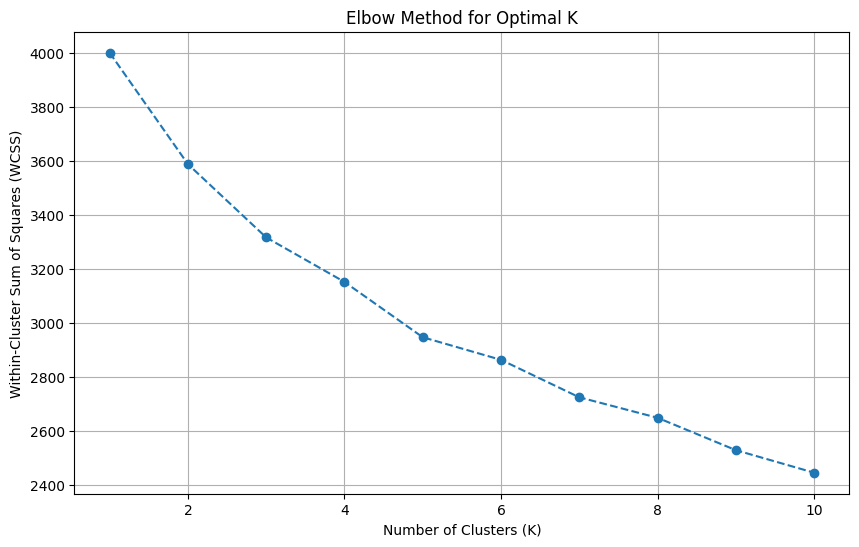

In [132]:
# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


# 7. Model Training and Visualization

**Train the K-Means model using the optimal value of K.**

In [133]:
# Step 8: Fit the K-Means Model
# From the Elbow plot, choose the optimal K (e.g., suppose optimal K is 4)
k_optimal = 6
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [134]:
# Step 9: Add Cluster Labels to the Dataset
# Add the cluster labels to the original dataset for further analysis
df['Cluster'] = kmeans.labels_

# 8. Create cluster graphs such as:
    ▪ Student Segments Scatter Plot

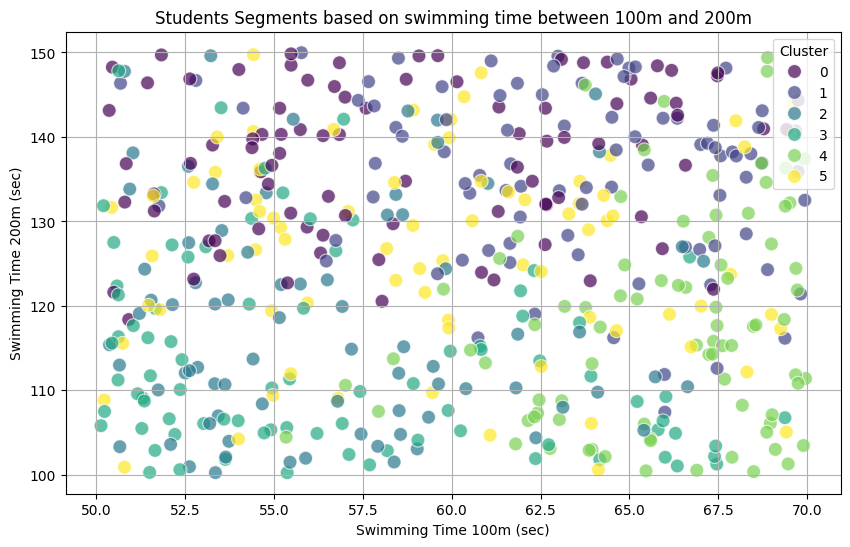

In [135]:
# Step 10: Visualizing the Clusters
# Plot the clusters for two features to visualize the grouping
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Swimming Time 100m (sec)', y='Swimming Time 200m (sec)', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.7)
plt.xlabel('Swimming Time 100m (sec)')
plt.ylabel('Swimming Time 200m (sec)')
plt.title('Students Segments based on swimming time between 100m and 200m')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

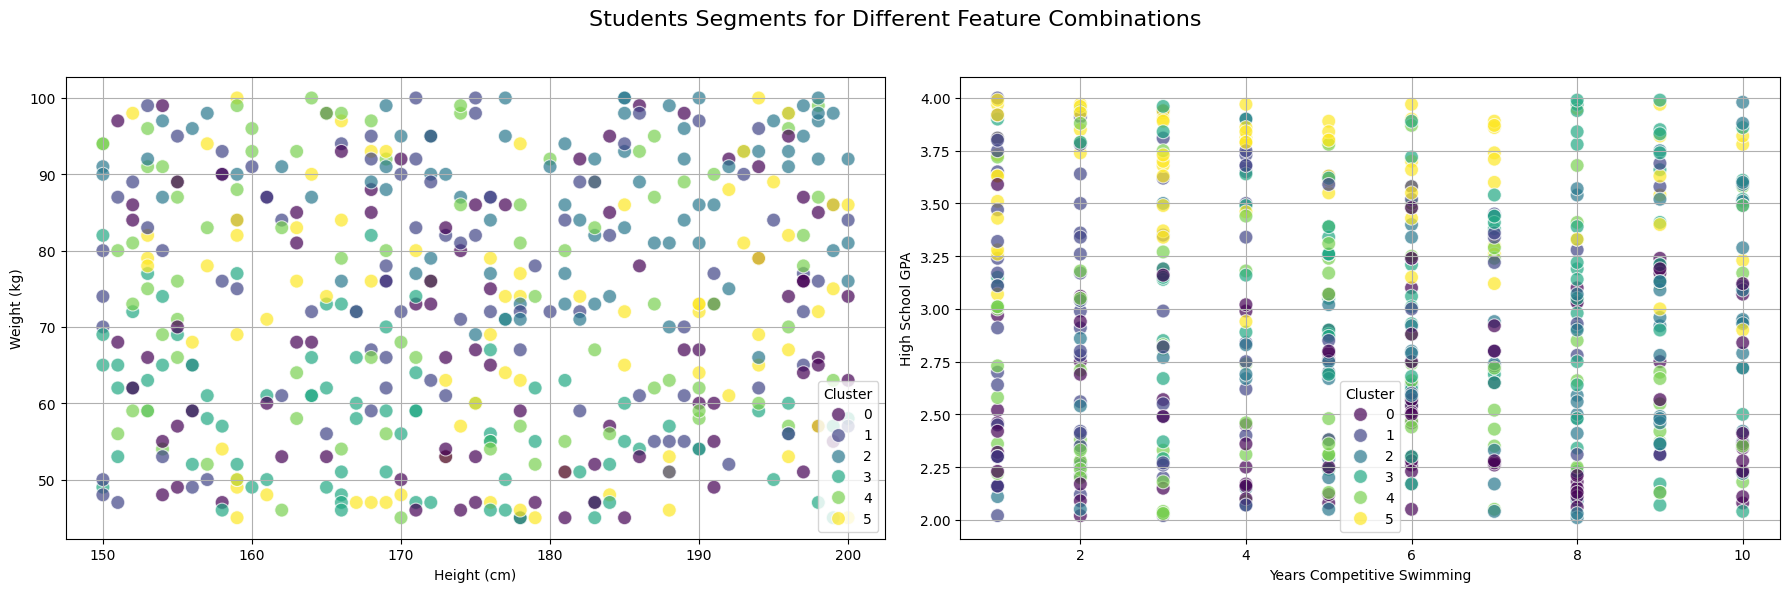

In [136]:
# Step 10: Visualizing the Clusters
# Plot the clusters for all combinations of two features using a 3x3 multi-panel plot
feature_combinations = [('Height (cm)', 'Weight (kg)'), ('Years Competitive Swimming', 'High School GPA')]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Students Segments for Different Feature Combinations', fontsize=16)

for i, (x_feature, y_feature) in enumerate(feature_combinations):
    ax = axes[i]
    sns.scatterplot(x=x_feature, y=y_feature, hue='Cluster', palette='viridis', data=df, s=100, alpha=0.7, ax=ax)
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend(title='Cluster')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Silhouette Graph**

In [137]:
# Step 11: Evaluate the Clustering Performance (Silhouette Score)
# Compute the silhouette score, which evaluates how well each point lies within its cluster
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"\nSilhouette Score for K = {k_optimal}: {silhouette_avg:.2f}")


Silhouette Score for K = 6: 0.09



Silhouette Score for K = 6: 0.09


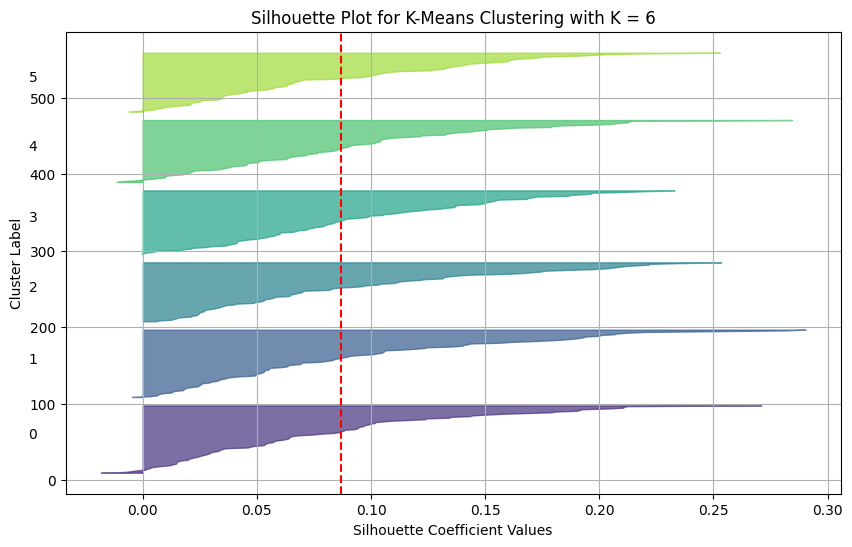

In [138]:
# Step 11: Evaluate the Clustering Performance (Silhouette Score)
# Compute the silhouette score, which evaluates how well each point lies within its cluster
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"\nSilhouette Score for K = {k_optimal}: {silhouette_avg:.2f}")

# Visualize the Silhouette Scores for Each Sample
from sklearn.metrics import silhouette_samples  # Ensure silhouette_samples is imported

silhouette_values = silhouette_samples(X_scaled, kmeans.labels_)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(k_optimal):
    ith_cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = sns.color_palette('viridis', k_optimal)[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for the space between clusters

plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for K-Means Clustering with K = " + str(k_optimal))
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.grid(True)
plt.show()


**Interpret the Results**

In [139]:
# Step 12: Interpret the Results
# Analyze each cluster based on descriptive statistics and understand the customer segments
print("\nCluster Analysis:")
print(df.groupby('Cluster').agg('mean', numeric_only=True))


Cluster Analysis:
               Age  High School GPA  Swimming Time 100m (sec)  \
Cluster                                                         
0        14.831461         2.558764                 58.628202   
1        17.224719         3.023483                 63.262921   
2        16.461538         2.795641                 56.658077   
3        16.690476         3.129048                 56.789286   
4        14.731707         2.778659                 65.880854   
5        15.871795         3.637051                 59.570769   

         Swimming Time 200m (sec)  Swimming Time 400m (sec)  \
Cluster                                                       
0                      137.506854                273.021798   
1                      135.588989                318.110899   
2                      118.290513                312.670769   
3                      113.534643                317.796071   
4                      117.642561                327.301098   
5                  

**Create a New DataFrame with Cluster Results**

In [140]:
# Step 14: Create a New DataFrame with Cluster Results
# Create a new dataframe called df_cluster that contains only the relevant features and the cluster numbers
df_cluster = df[features + ['Cluster']]


In [141]:
df_cluster.sample(10)

Age  High School GPA  Swimming Time 100m (sec)  Swimming Time 200m (sec)  \
497   14             2.17                     64.14                    139.19   
254   14             2.57                     53.17                    127.69   
405   18             3.85                     66.03                    109.26   
327   18             2.33                     58.19                    130.76   
238   18             2.04                     66.49                    127.00   
342   16             2.46                     65.22                    120.81   
205   16             2.73                     65.16                    140.02   
228   16             3.43                     64.47                    137.81   
453   18             2.38                     67.47                    112.61   
332   14             2.72                     63.03                    106.54   

     Swimming Time 400m (sec)  Years Competitive Swimming  Height (cm)  \
497                    327.38                           2          196   
254                    228.39                           6          197   
405                    323.41                           9          168   
327                    259.98                           7          166   
238                    363.81                           7          196   
342                    371.14                           4          179   
205                    381.23                           7          191   
228                    232.45                           6          166   
453                    224.11                           5          168   
332                    333.56                           7          163   

     Weight (kg)  Cluster  
497           74        0  
254           76        0  
405           82        3  
327           76        2  
238           93        2  
342           52        4  
205           77        1  
228           97        5  
453           92        1  
332           93        4

**Count Plot to visualize cluster counts**

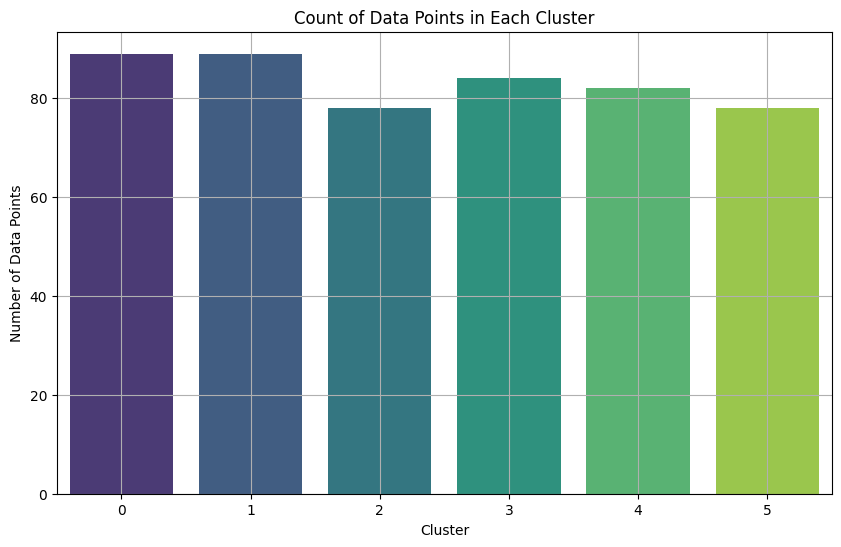

In [142]:
# Step 15: Visualize Cluster Counts
# Use a count plot to visualize the number of data points in each cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Count of Data Points in Each Cluster')
plt.grid(True)
plt.show()

**Pair Plot for visualizing the relationships between features within clusters.**

In [143]:
# Step 16: Pairplot for Cluster Analysis
# Create a pairplot to visualize the relationships between features in different clusters
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.6, 's': 80})
plt.suptitle('Pairplot for Student Segmentation by Cluster', y=1.02, fontsize=16)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Corelation heatmap of feature means by cluster**

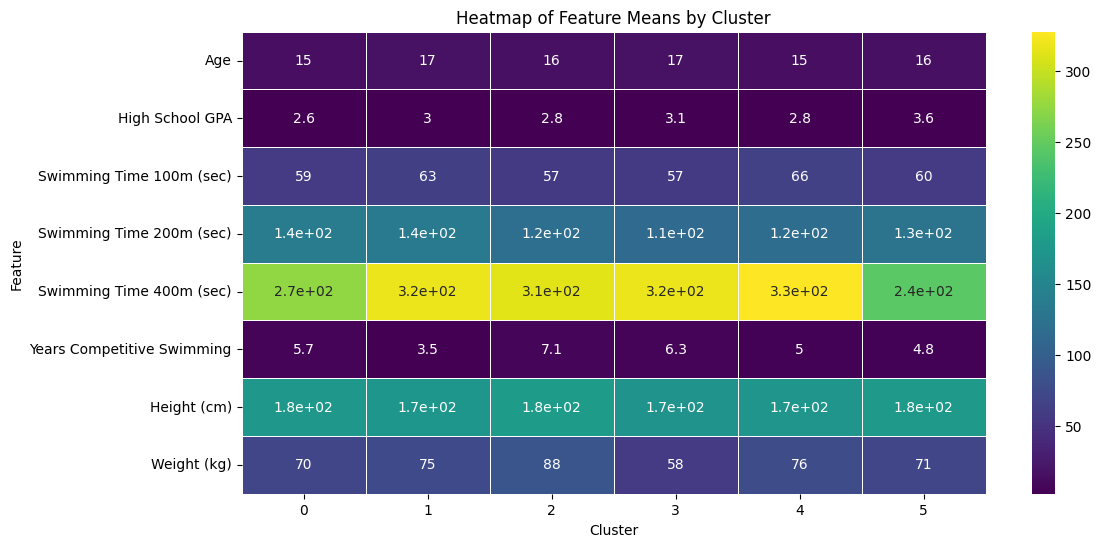

In [144]:
# Step 17: Heatmap of Feature Means by Cluster
# Create a heatmap to visualize the average values of features for each cluster
cluster_means = df.groupby('Cluster').mean(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Heatmap of Feature Means by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

**Boxplots for Feature Distributions by Cluster**

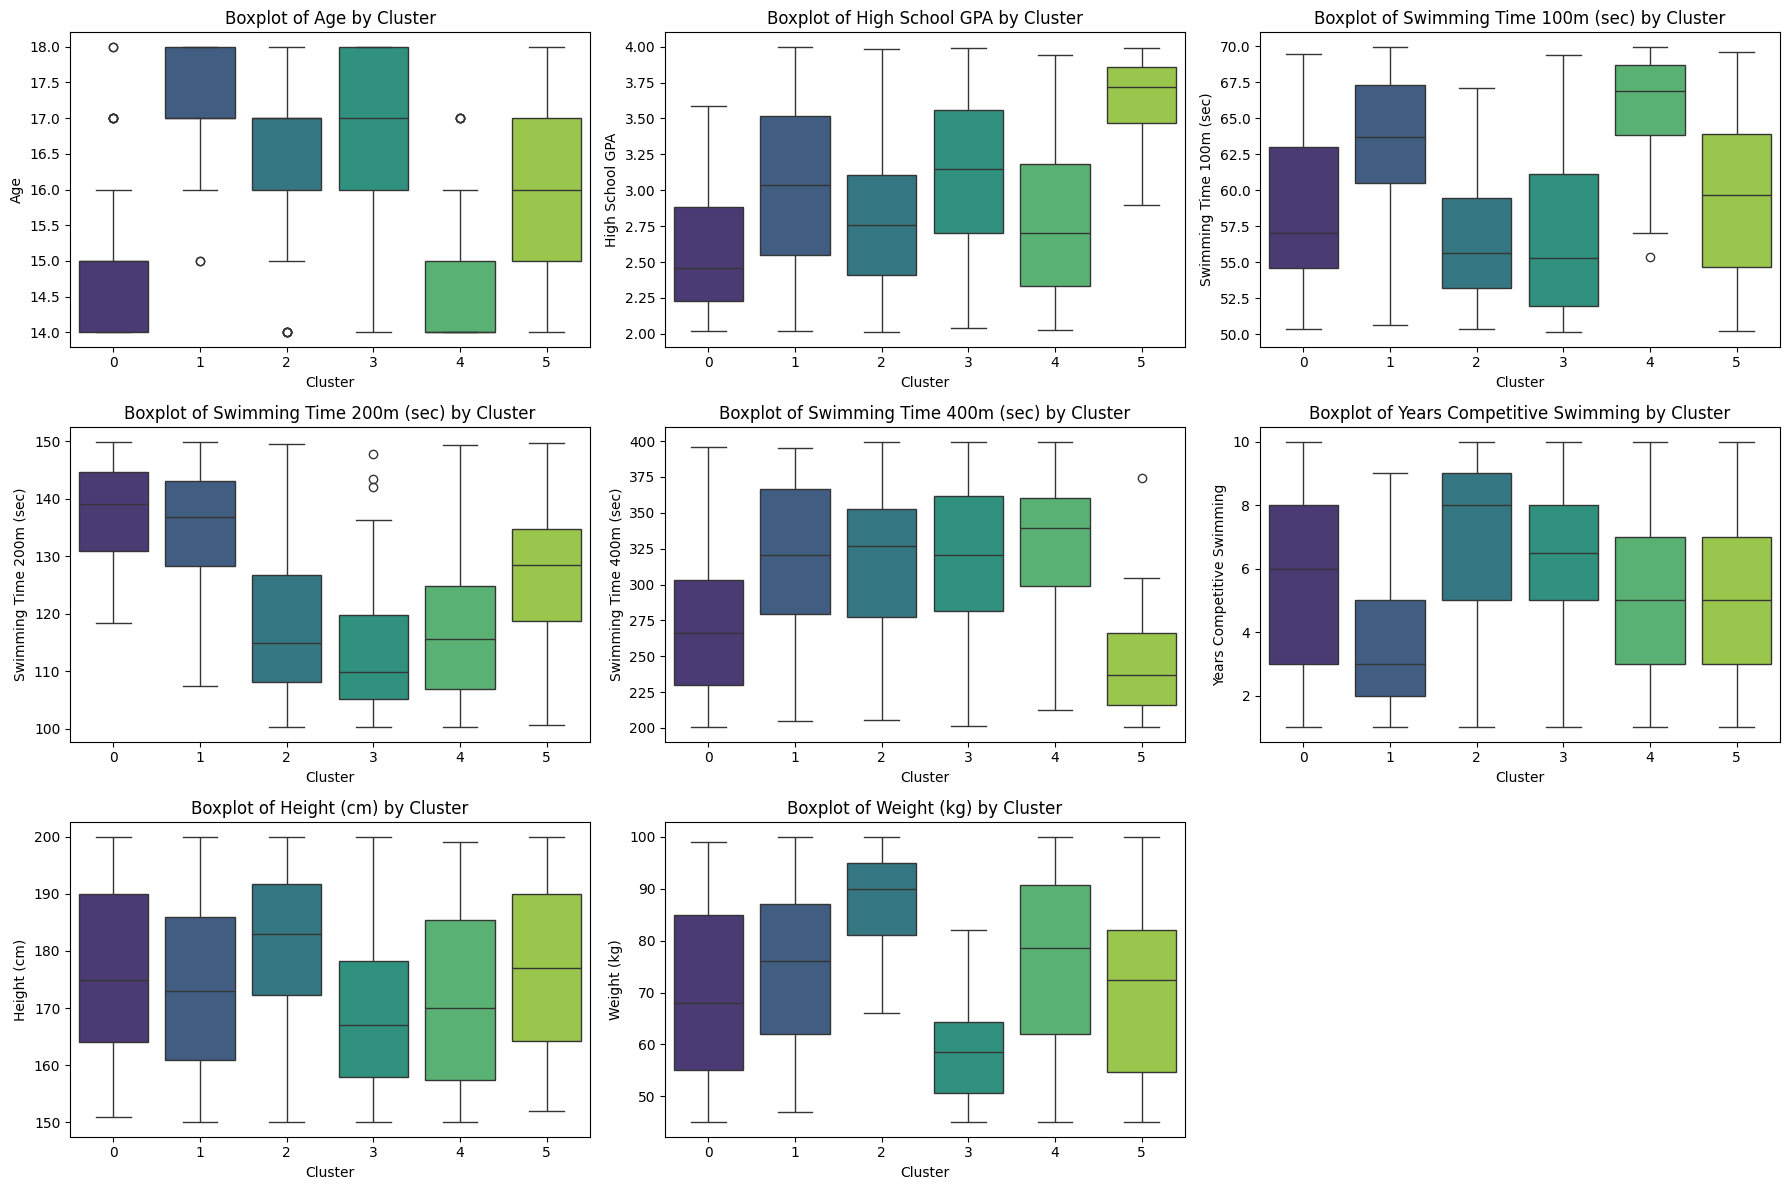

In [145]:
# Step 18: Boxplots for Feature Distributions by Cluster
# Create boxplots to visualize the distribution of each feature within each cluster
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

features_to_plot = ['Age', 'High School GPA', 'Swimming Time 100m (sec)',
       'Swimming Time 200m (sec)', 'Swimming Time 400m (sec)',
       'Years Competitive Swimming', 'Height (cm)', 'Weight (kg)']

for i, feature in enumerate(features_to_plot):
    sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

# Hide any unused axes
for ax in axes[len(categorical_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

**Violin Plots for Detailed Feature Distributions by Cluster**

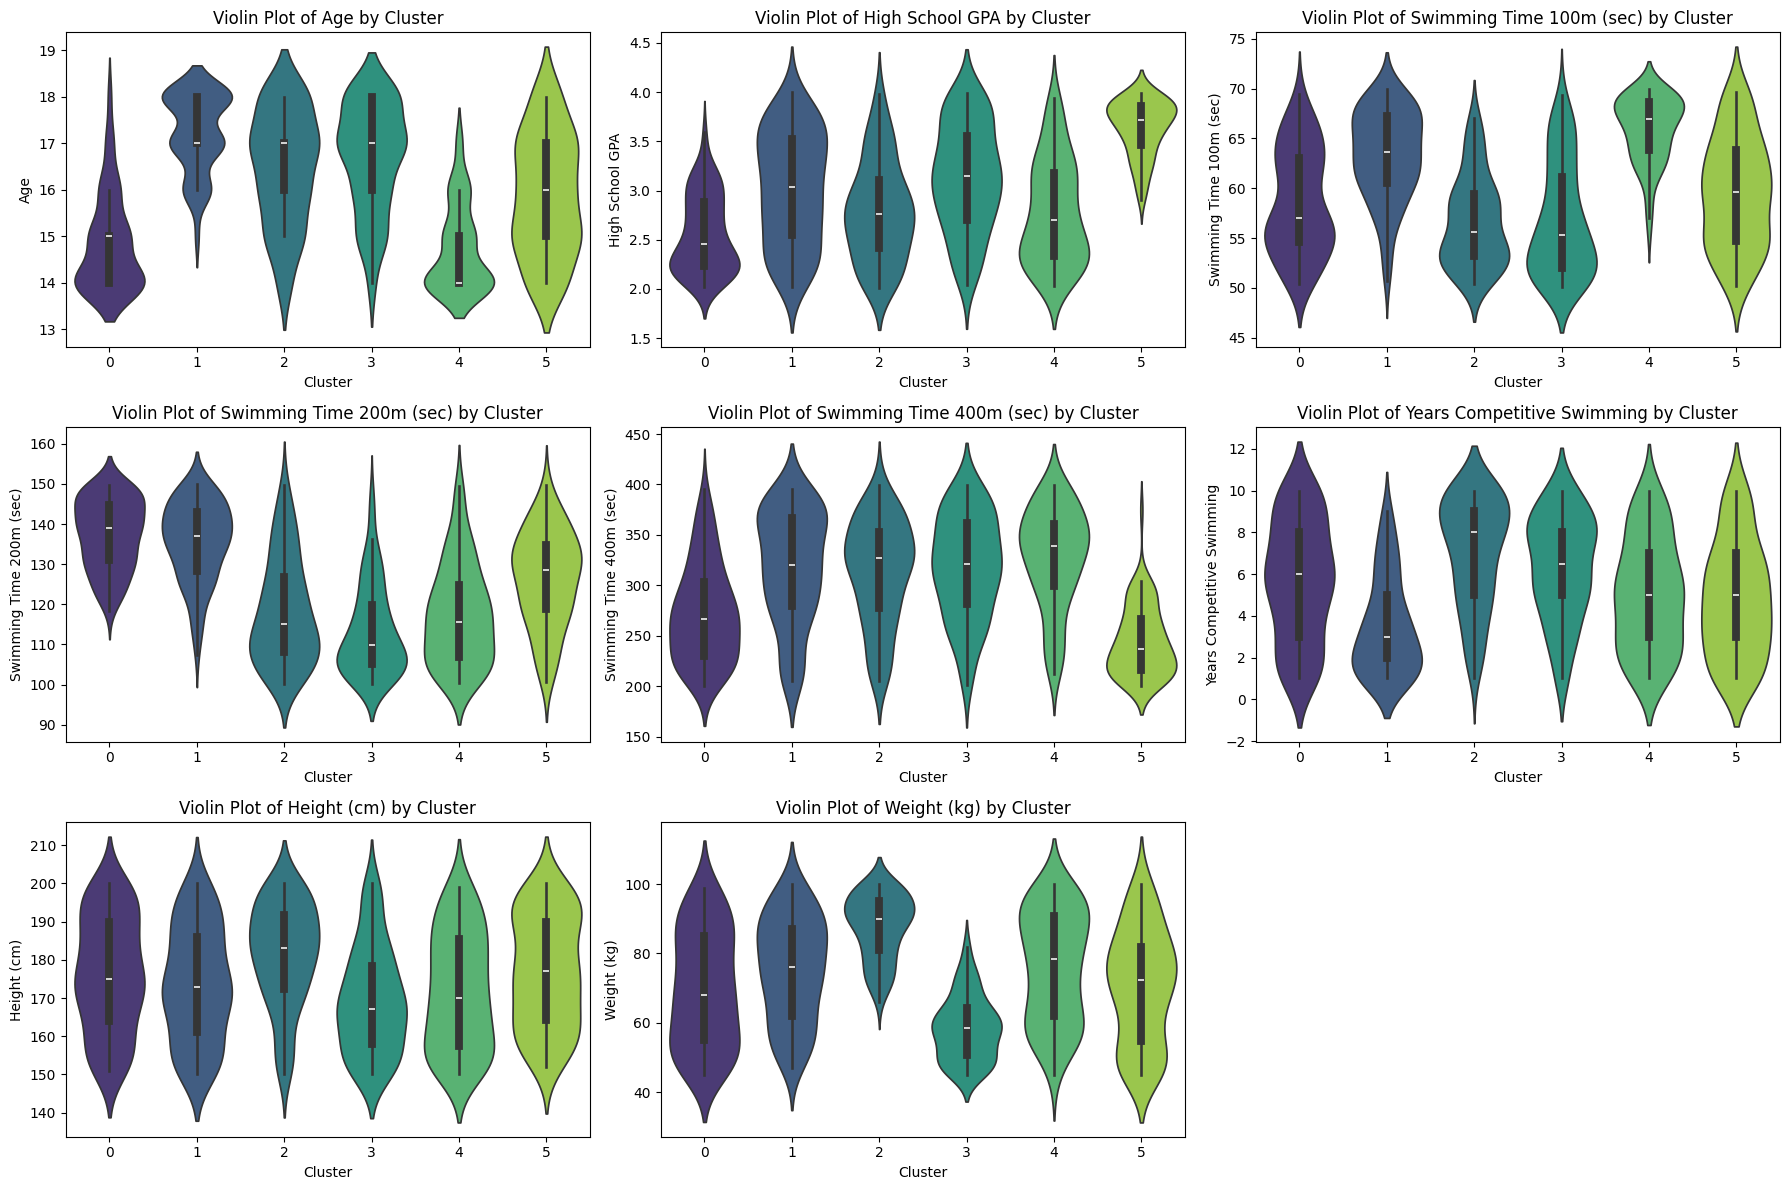

In [146]:
# Step 19: Violin Plots for Detailed Feature Distributions by Cluster
# Create violin plots to visualize the distribution of each feature within each cluster
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.violinplot(x='Cluster', y=feature, data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Violin Plot of {feature} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

# Hide any unused axes
for ax in axes[len(categorical_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

**3D Scatter Plot for Visualizing Clusters in 3D Space**

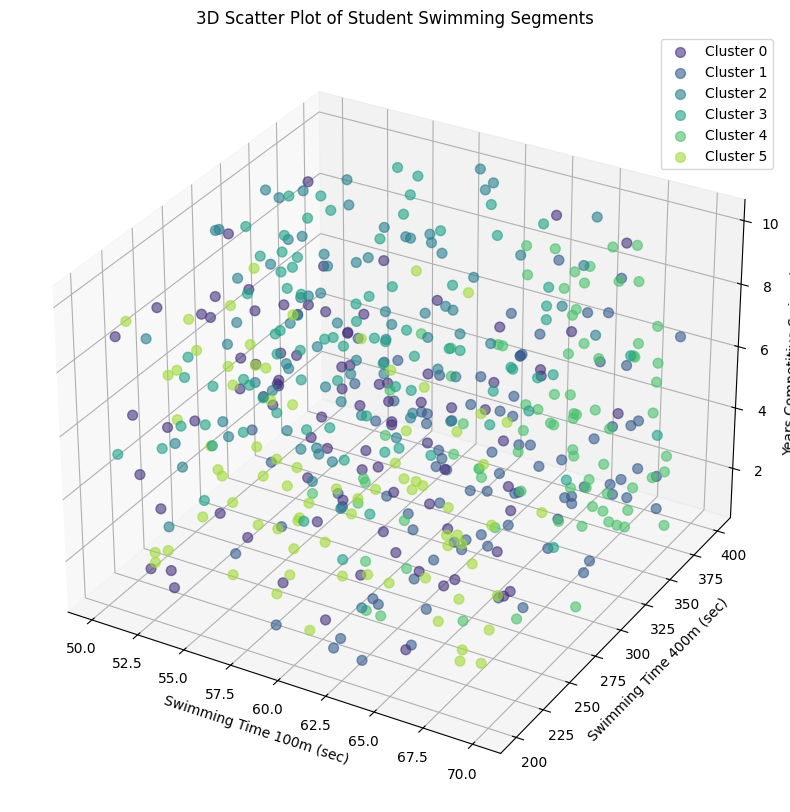

In [147]:
# Step 20: 3D Scatter Plot for Visualizing Clusters in 3D Space
# Create a 3D scatter plot to visualize clusters with all three features
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
colors = sns.color_palette('viridis', k_optimal)
for cluster in range(k_optimal):
    cluster_points = df[df['Cluster'] == cluster]
    ax.scatter(cluster_points['Swimming Time 100m (sec)'], cluster_points['Swimming Time 400m (sec)'], cluster_points['Years Competitive Swimming'],
               s=50, color=colors[cluster], alpha=0.6, label=f'Cluster {cluster}')
ax.set_xlabel('Swimming Time 100m (sec)')
ax.set_ylabel('Swimming Time 400m (sec)')
ax.set_zlabel('Years Competitive Swimming')
plt.title('3D Scatter Plot of Student Swimming Segments')
plt.legend()
plt.show()

**Radar Chart for Cluster Comparison**

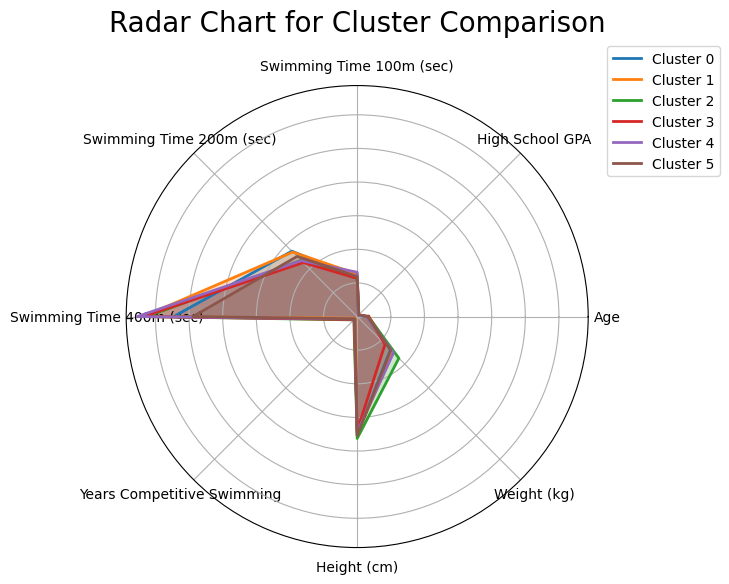

In [148]:
# Step 21: Radar Chart for Cluster Comparison
# Create a radar chart to visualize the average feature values across different clusters
def radar_chart(data, features, title):
    categories = list(features)
    num_vars = len(categories)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for i, row in data.iterrows():
        values = row[features].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}')
        ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    plt.title(title, size=20, color='black', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

radar_chart(cluster_means, features, 'Radar Chart for Cluster Comparison')


# 9. Try Different Scaling Techniques to improve silhouette score

In [149]:
# Step 22.2: Try Different Scaling Techniques
# Instead of StandardScaler, try other scaling techniques like MinMaxScaler or RobustScaler for better performance.
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X)

In [150]:
# Fit K-Means Model with MinMax Scaled Data
kmeans_minmax = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_minmax.fit(X_scaled_minmax)
silhouette_avg_minmax = silhouette_score(X_scaled_minmax, kmeans_minmax.labels_)
print(f"Silhouette Score with MinMax Scaling for K = {k_optimal}: {silhouette_avg_minmax:.2f}")


Silhouette Score with MinMax Scaling for K = 6: 0.10


# 10. Improvement Using PCA

    Apply Principal Component Analysis (PCA) to reduce dimensionality and improve clustering quality.

In [151]:
# Step 22.5: Use PCA for Dimensionality Reduction before Clustering
# Reduce the dataset to fewer dimensions using PCA and then apply K-Means
from sklearn.decomposition import PCA  # For dimensionality reduction and visualizing high-dimensional data  # For evaluating clustering performance
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans_pca = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_pca.fit(X_pca)
silhouette_avg_pca = silhouette_score(X_pca, kmeans_pca.labels_)
print(f"Silhouette Score with PCA for K = {k_optimal}: {silhouette_avg_pca:.2f}")

Silhouette Score with PCA for K = 6: 0.33


# Part 2: DBSCAN Clustering (Coding)

**1. Data Preprocessing**

    o Use the same preprocessed dataset as in Part 1.

In [152]:
# Running DBSCAN with default values
scaler = MinMaxScaler()  # Initialize the MinMaxScaler
df_scaled_dbscan = scaler.fit_transform(X)  # Scale the numerical features, excluding CustomerID explicitly for DBSCAN

**2. Model Training and Visualization**

In [153]:
# Fitting DBSCAN
dbscan = DBSCAN()  # Initialize DBSCAN with default parameters
dbscan_labels = dbscan.fit_predict(df_scaled_dbscan)  # Fit DBSCAN and get cluster labels
df['DBSCAN'] = dbscan_labels  # Add DBSCAN cluster labels to the original dataframe

**Train the DBSCAN model using suitable eps and min_samples parameters.**

In [154]:
# Silhouette scores for different epsilon values
eps_values = [0.1, 0.2, 0.3, 0.5, 0.8]  # List of epsilon values to evaluate
silhouette_dbscan = []  # List to store silhouette scores

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)  # Initialize DBSCAN with a specific epsilon
    labels = dbscan.fit_predict(df_scaled_dbscan)  # Fit DBSCAN and get labels
    if len(set(labels)) > 1:  # Check if more than one cluster is formed
        silhouette_avg = silhouette_score(df_scaled_dbscan, labels)  # Calculate silhouette score
        silhouette_dbscan.append((eps, silhouette_avg))  # Append the epsilon and silhouette score to the list

**Plot the clusters and identify any noise points (i.e., points not assigned to a cluster).**

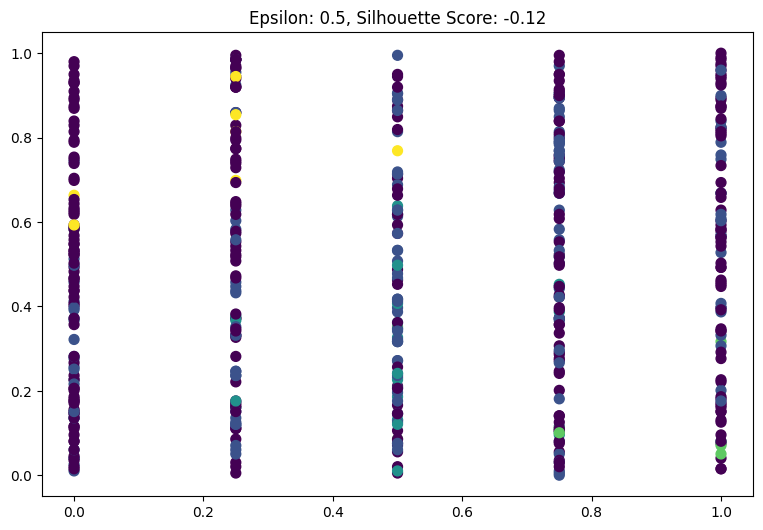

Epsilon: 0.5, Silhouette Score: -0.115644405644629


In [155]:
# Plotting silhouette scores and clusters for DBSCAN
eps_values = [0.1, 0.2, 0.3, 0.5, 0.8]
plt.figure(figsize=(15, 15))
for idx, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(df_scaled_dbscan)
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(df_scaled_dbscan, labels)
        plt.subplot(3, 2, idx + 1)
        plt.title(f'Epsilon: {eps}, Silhouette Score: {silhouette_avg:.2f}')
        plt.scatter(df_scaled_dbscan[:, 0], df_scaled_dbscan[:, 1], c=labels, cmap='viridis', s=50)
plt.tight_layout()
plt.show()
for eps, score in silhouette_dbscan:
    print(f'Epsilon: {eps}, Silhouette Score: {score}')  # Print silhouette score for each epsilon

**Visualize clustering results using:**

    ▪ Silhouette Analysis for evaluating the performance of DBSCAN.

In [156]:
# Printing silhouette scores
for eps, score in silhouette_dbscan:
    print(f'Epsilon: {eps}, Silhouette Score: {score}')

Epsilon: 0.5, Silhouette Score: -0.115644405644629


**Scatter Plot of Clusters.**

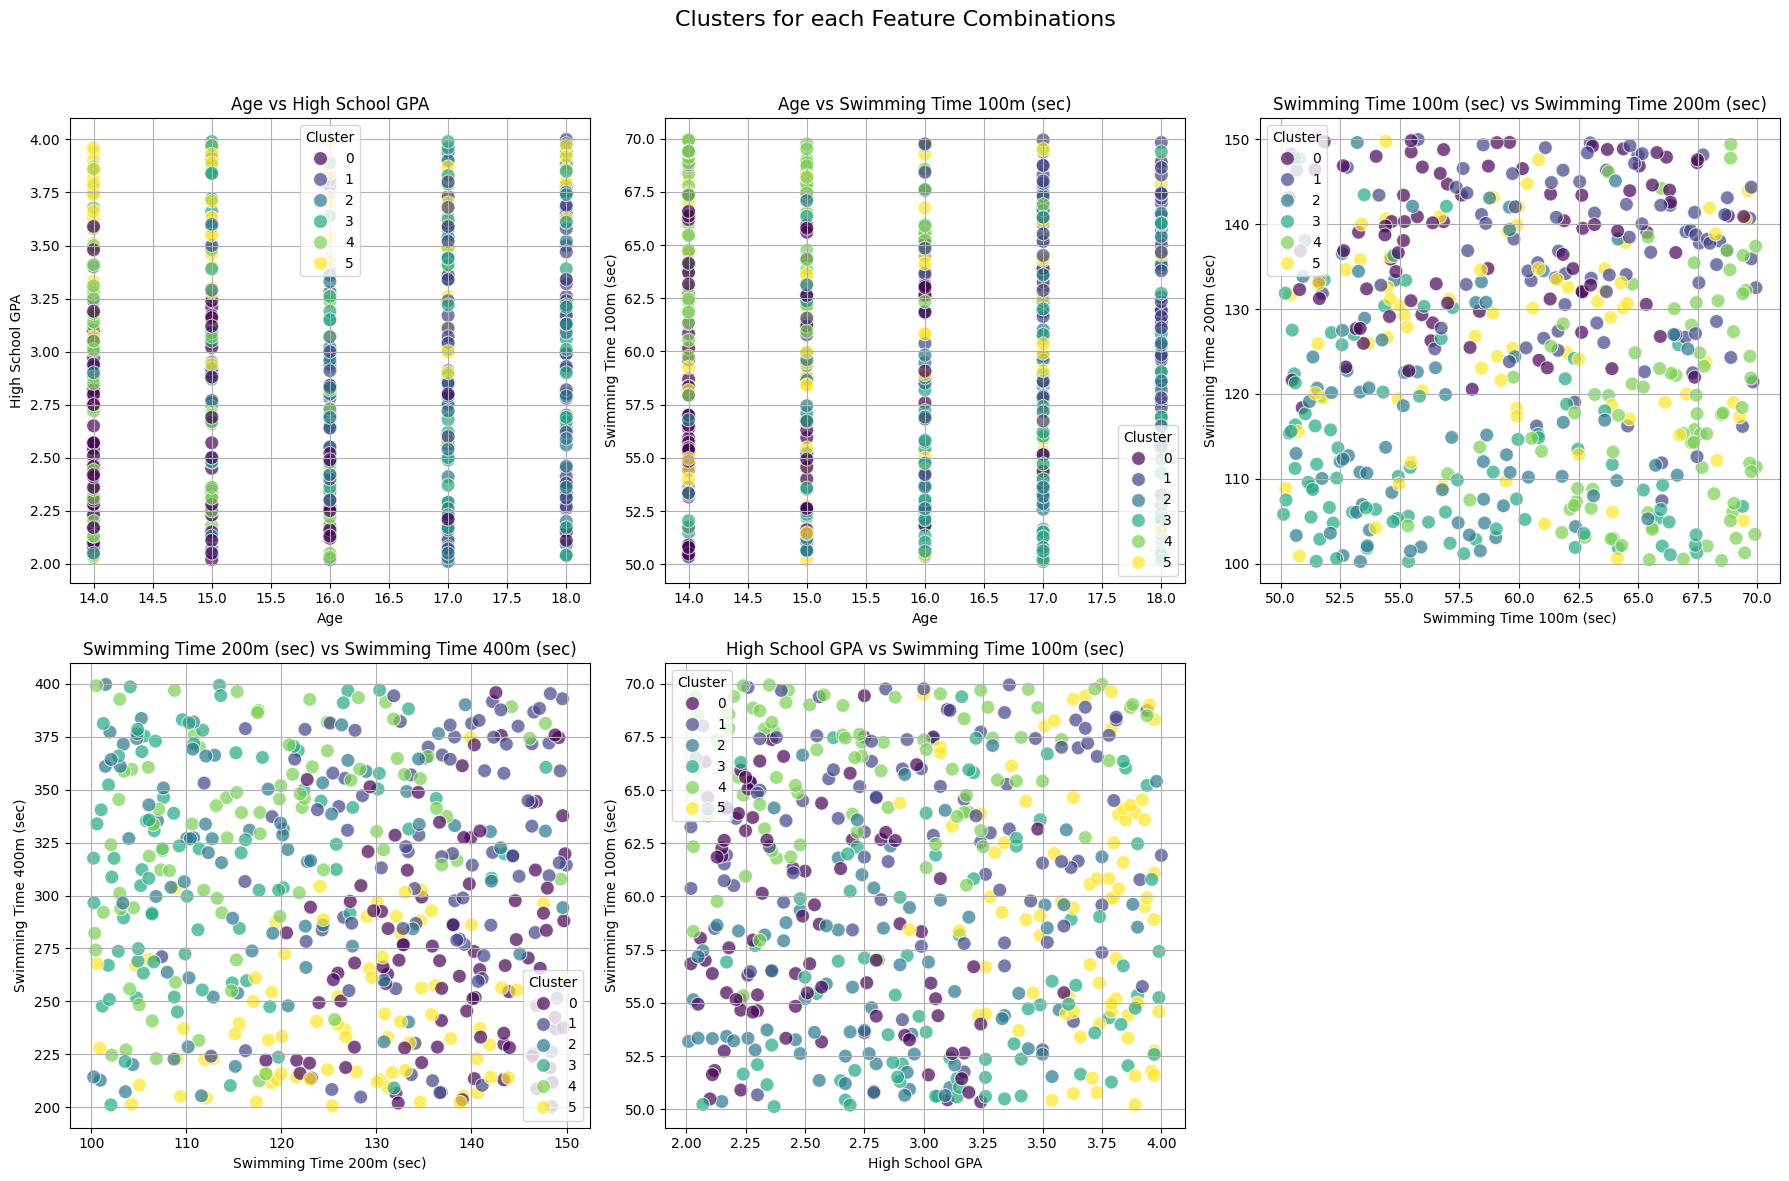

In [157]:
# Visualize the feature clusters using scatter plot
feature_combinations = [
    ('Age', 'High School GPA'),
    ('Age', 'Swimming Time 100m (sec)'),
    ('Swimming Time 100m (sec)', 'Swimming Time 200m (sec)'),
    ('Swimming Time 200m (sec)', 'Swimming Time 400m (sec)'),
    ('High School GPA', 'Swimming Time 100m (sec)')
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2x3 grid for easier indexing
fig.suptitle('Clusters for each Feature Combinations', fontsize=16)

for i, (x_feature, y_feature) in enumerate(feature_combinations):
    if i < len(axes):  # Ensure we don't index out of bounds
        sns.scatterplot(x=x_feature, y=y_feature, hue='Cluster', palette='viridis', data=df, s=100, alpha=0.7, ax=axes[i])
        axes[i].set_xlabel(x_feature)
        axes[i].set_ylabel(y_feature)
        axes[i].set_title(f'{x_feature} vs {y_feature}')
        axes[i].legend(title='Cluster')
        axes[i].grid(True)

# Turn off unused subplots if any
for i in range(len(feature_combinations), len(axes)):
    axes[i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Heatmap for average feature values by cluster.**

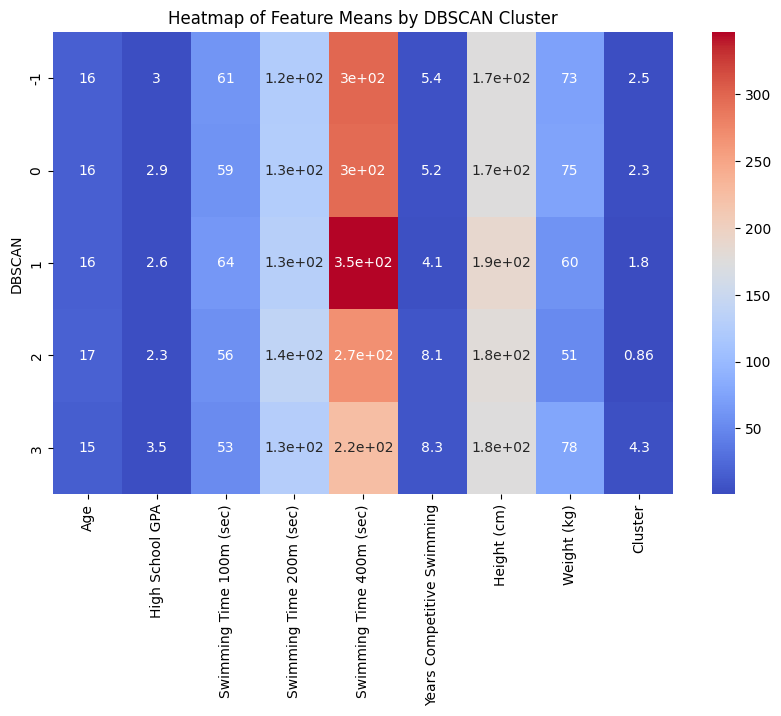

In [158]:
# Heatmap for DBSCAN clustering
# Plotting heatmap of feature means by cluster for DBSCAN
df['DBSCAN'] = df['DBSCAN'].astype('category')

dbscan_feature_means = df.groupby('DBSCAN').mean(numeric_only=True)  # Calculate mean of features for each DBSCAN cluster
plt.figure(figsize=(10, 6))
sns.heatmap(dbscan_feature_means, annot=True, cmap='coolwarm')  # Plot heatmap of feature means by cluster
plt.title('Heatmap of Feature Means by DBSCAN Cluster')
plt.show()

**Boxplots to show how different features vary within each cluster.**

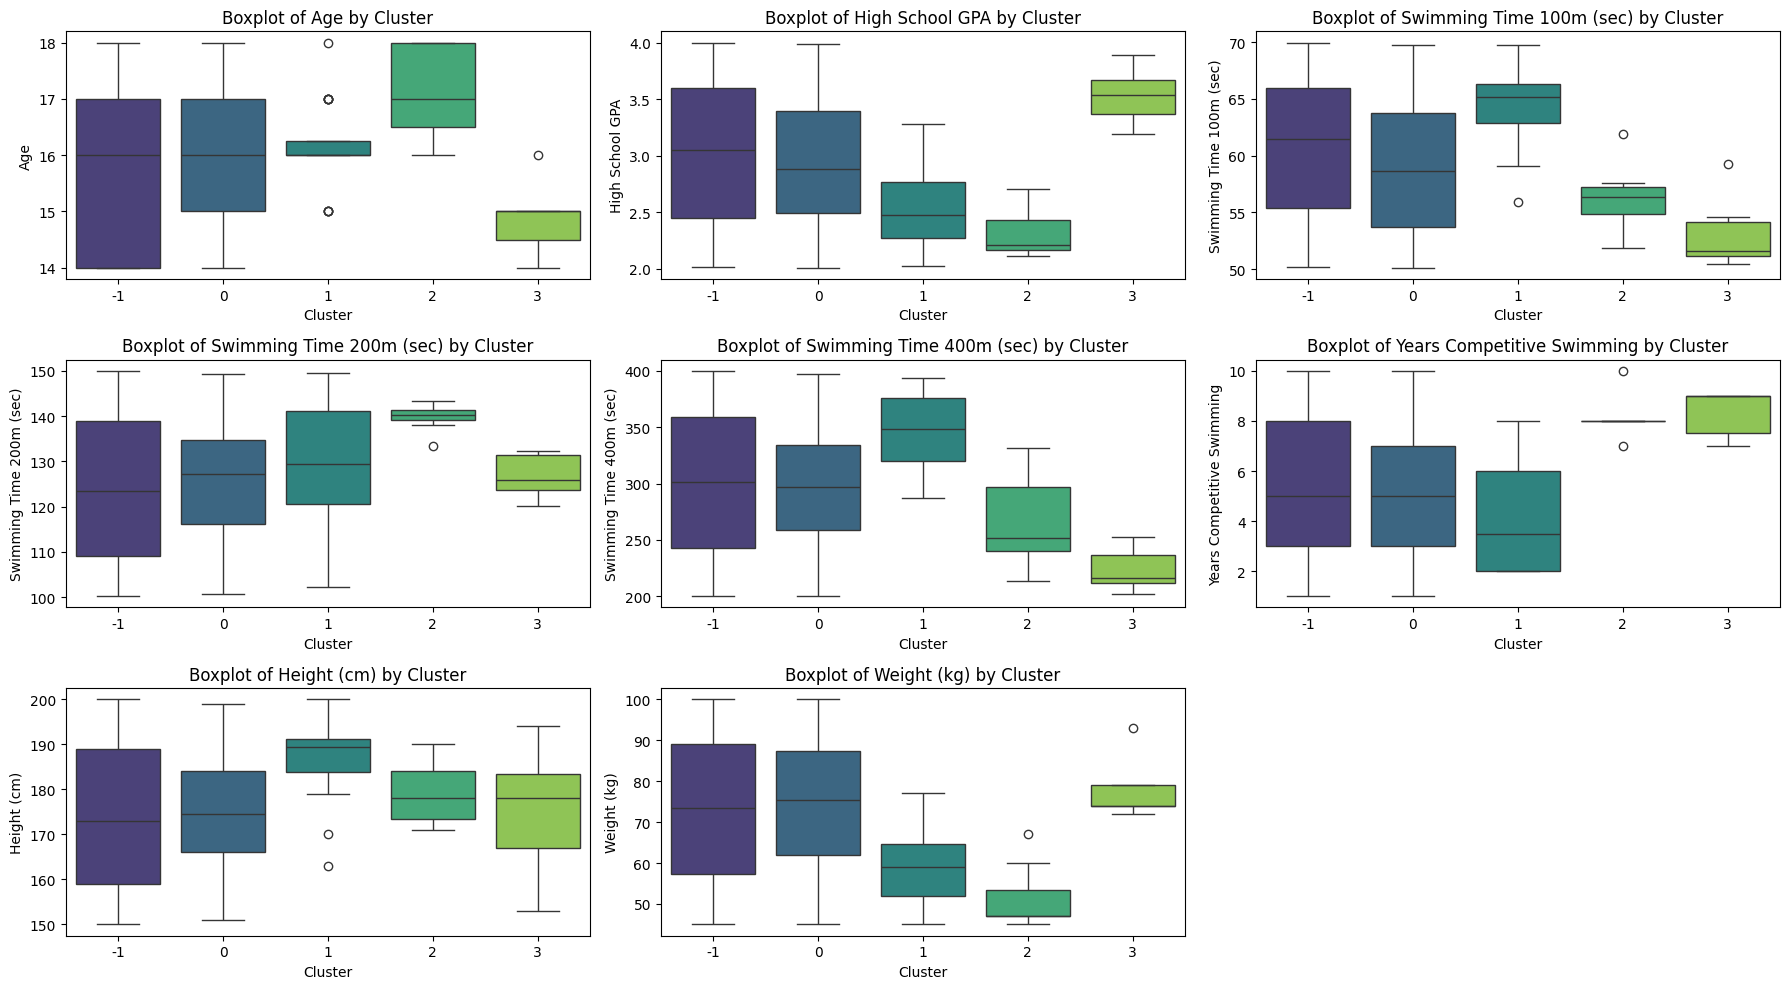

In [159]:
# Boxplots for Feature Distributions by Cluster
# Create boxplots to visualize the distribution of each feature within each cluster
fig, axes = plt.subplots(3, 3, figsize=(18, 10))  # Create subplots for boxplots
axes = axes.flatten()  # Flatten the axes for easy indexing

features_to_plot = ['Age', 'High School GPA', 'Swimming Time 100m (sec)',
                    'Swimming Time 200m (sec)', 'Swimming Time 400m (sec)', 'Years Competitive Swimming', 'Height (cm)', 'Weight (kg)']  # List of features to plot
for i, feature in enumerate(features_to_plot):
    sns.boxplot(x='DBSCAN', y=feature, data=df, palette='viridis', ax=axes[i])  # Create boxplot for each feature
    axes[i].set_title(f'Boxplot of {feature} by Cluster')  # Set the title for each boxplot
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

# Hide any unused axes
for ax in axes[len(categorical_columns):]:
    ax.axis('off')

plt.tight_layout()  # Adjust the layout
plt.show()

# Part 3: Hierarchical Clustering (Coding)

# 1. Data Preprocessing

    o Use the preprocessed dataset from Part 1.

In [160]:
# Scaling the data for hierarchical clustering
scaler = MinMaxScaler()  # Initialize the MinMaxScaler
df_scaled_hc = scaler.fit_transform(X)  # Scale the numerical features, excluding CustomerID explicitly for Hierarchical Clustering

# 2. Model Training and Dendrogram Analysis

    Plot the Dendrogram to visually assess the clusters.

    Cut the dendrogram at a chosen level to form the clusters.

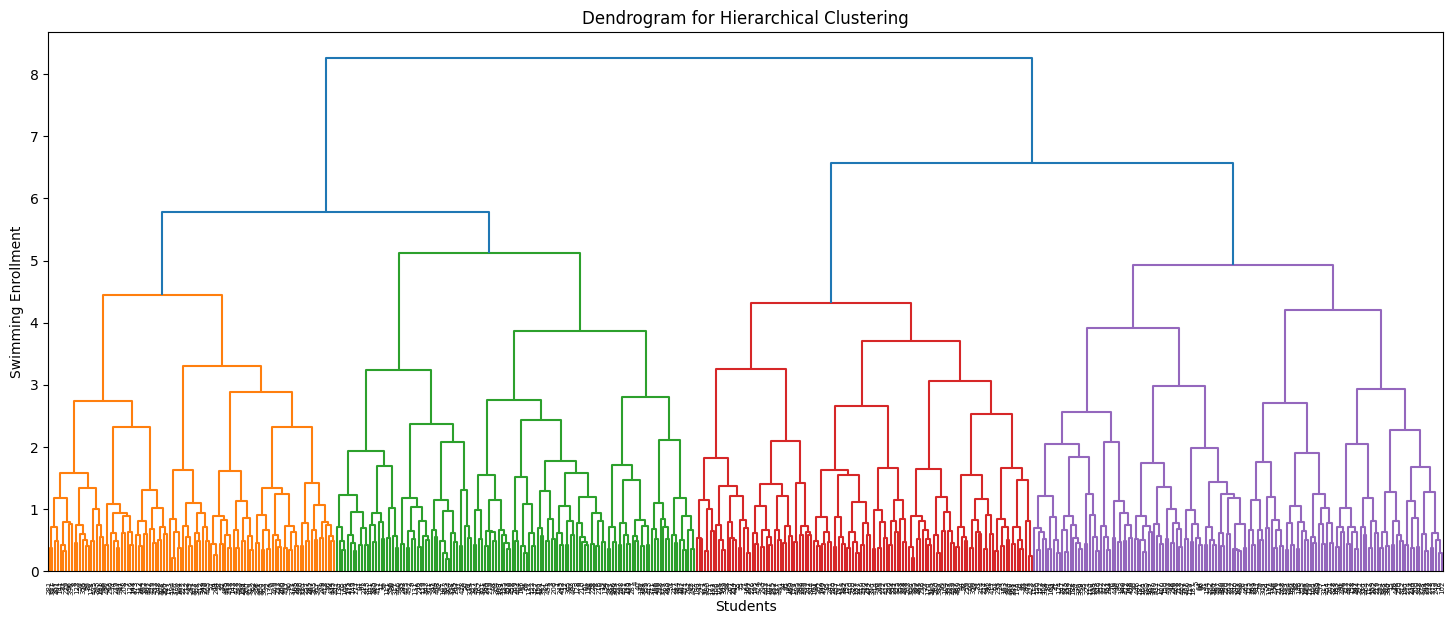

In [161]:
# Plotting the dendrogram
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize=(18, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled_hc, method='ward'))  # Create dendrogram using Ward's linkage
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Students')
plt.ylabel('Swimming Enrollment')
plt.show()

**Train the Hierarchical Clustering model using Agglomerative Clustering.**

In [162]:
# Fitting the hierarchical clustering to the dataset
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')  # Initialize Agglomerative Clustering with 4 clusters
hc_labels = hc.fit_predict(df_scaled_hc)  # Fit the model and get cluster labels
df['Hierarchical'] = hc_labels  # Add the cluster labels to the original dataframe


In [163]:
# Silhouette score for Hierarchical clustering
silhouette_hc = silhouette_score(df_scaled_hc, hc_labels)  # Calculate silhouette score for hierarchical clustering
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hc}')  # Print silhouette score

Silhouette Score for Hierarchical Clustering: 0.06568230231127008


# 3. Visualize Clustering Results

    Create a Cluster Heatmap to show differences among clusters.


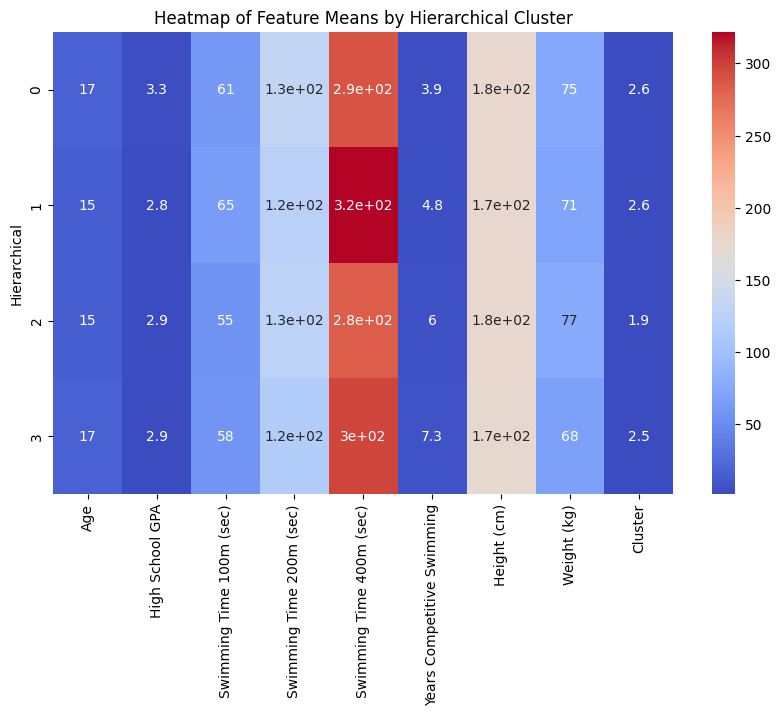

In [164]:
# Heatmap for Hierarchical clustering
# Plotting heatmap of feature means by cluster for Hierarchical Clustering
hierarchical_feature_means = df.groupby('Hierarchical').mean(numeric_only=True)  # Calculate mean of features for each hierarchical cluster
plt.figure(figsize=(10, 6))
sns.heatmap(hierarchical_feature_means, annot=True, cmap='coolwarm')  # Plot heatmap of feature means by cluster
plt.title('Heatmap of Feature Means by Hierarchical Cluster')
plt.show()

**Boxplots for feature distribution analysis by cluster.**

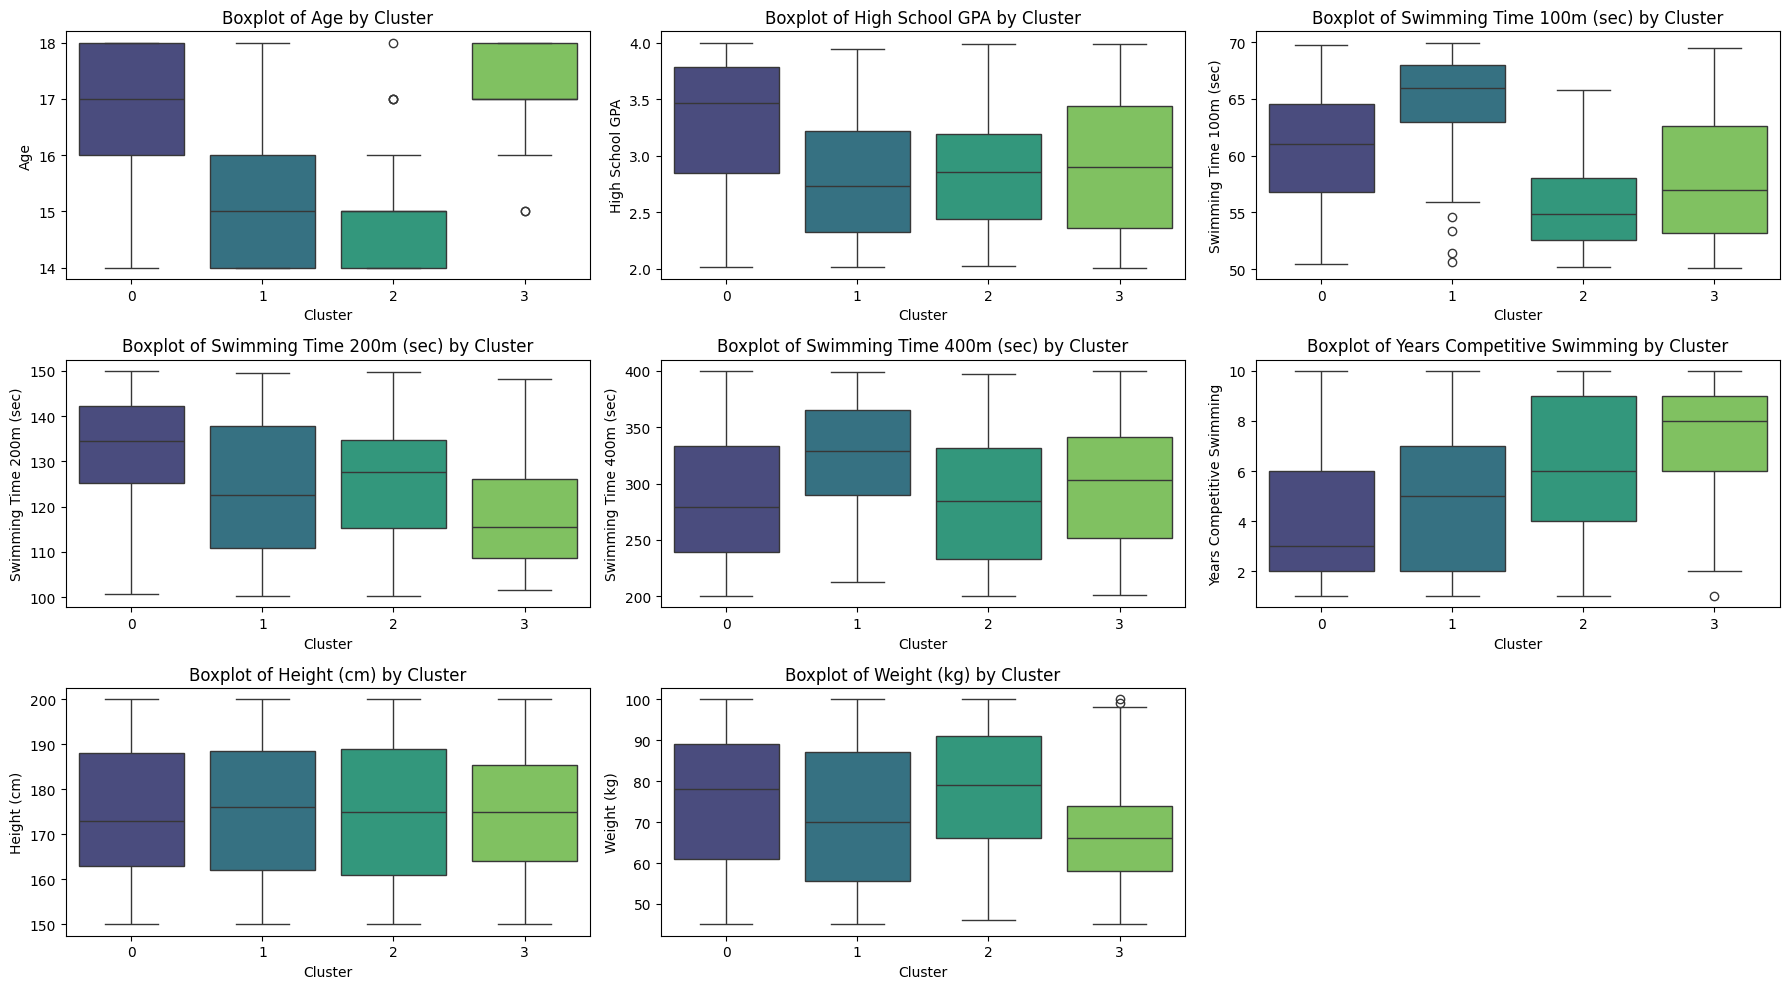

In [165]:
# Boxplots for Feature Distributions by Cluster
# Create boxplots to visualize the distribution of each feature within each cluster
fig, axes = plt.subplots(3, 3, figsize=(18, 10))  # Create subplots for boxplots
axes = axes.flatten()  # Flatten the axes for easy indexing

features_to_plot = ['Age', 'High School GPA', 'Swimming Time 100m (sec)',
                    'Swimming Time 200m (sec)', 'Swimming Time 400m (sec)', 'Years Competitive Swimming', 'Height (cm)', 'Weight (kg)']  # List of features to plot
for i, feature in enumerate(features_to_plot):
    sns.boxplot(x='Hierarchical', y=feature, data=df, palette='viridis', ax=axes[i])  # Create boxplot for each feature
    axes[i].set_title(f'Boxplot of {feature} by Cluster')  # Set the title for each boxplot
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

# Hide any unused axes
for ax in axes[len(categorical_columns):]:
    ax.axis('off')

plt.tight_layout()  # Adjust the layout
plt.show()

#Convert notebook to html

In [166]:
!ls drive/MyDrive/Machine_Learning/Assignment_4

Assignment_4_Killariben_Limbachiya.html   DS_520_Assignment_4.pdf
Assignment_4_Killariben_Limbachiya.ipynb  swimming_scholarship_dataset_expanded.csv


In [167]:
!jupyter nbconvert --to html /content/drive/MyDrive/Machine_Learning/Assignment_4/Assignment_4_Killariben_Limbachiya.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Machine_Learning/Assignment_4/Assignment_4_Killariben_Limbachiya.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 2036975 bytes to /content/drive/MyDrive/Machine_Learning/Assignment_4/Assignment_4_Killariben_Limbachiya.html
